In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
from google.colab import files
uploaded=files.upload()

Saving predictions.csv to predictions.csv
Saving areas.csv to areas.csv


In [8]:
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


from matplotlib import pyplot as plt
df['area'].plot(kind='hist', bins=20, title='area')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=20, title='price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['area']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'area'}, axis=1)
              .sort_values('area', ascending=True))
  xs = counted['area']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('area', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('area')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['price']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'price'}, axis=1)
              .sort_values('price', ascending=True))
  xs = counted['price']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('price', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('price')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['area'].plot(kind='line', figsize=(8, 4), title='area')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

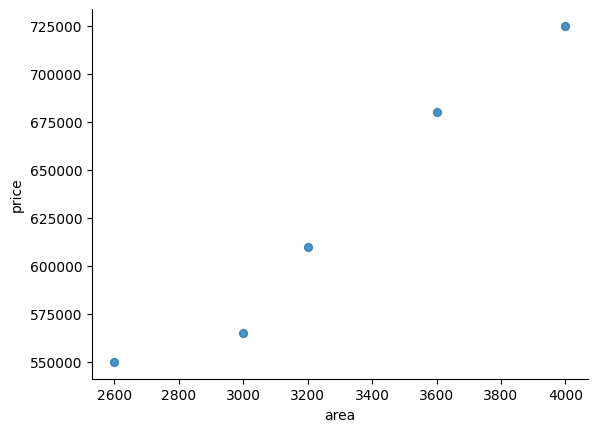

In [28]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area', y='price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

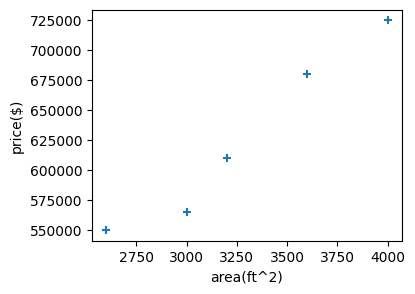

In [27]:
plt.figure(figsize = (4,3))
plt.xlabel('area(ft^2)')
plt.ylabel('price($)')
plt.scatter(df['area'], df['price'], marker = '+')
plt.show()

In [30]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df[['price']])

LinearRegression()

In [34]:
model.predict([[3300]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[628715.75342466]])

In [12]:
coef, bias = model.coef_, model.intercept_
coef, bias

(array([[135.78767123]]), array([180616.43835616]))

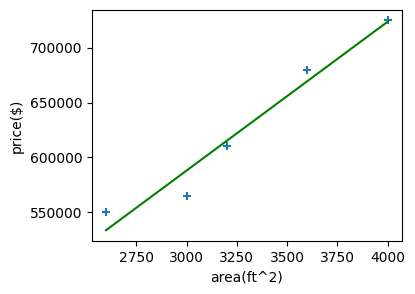

In [35]:
plt.figure(figsize = (4,3))
plt.xlabel('area(ft^2)')
plt.ylabel('price($)')
plt.scatter(df[['area']], df[['price']], marker = '+')
plt.plot(df[['area']], model.predict(df[['area']]), color = 'green')
plt.show()

In [16]:
df_area = pd.read_csv('areas.csv')
df_area.sample(3)

,area
11,8600
0,1000
10,9000


In [17]:
p = model.predict(df_area)
p

array([[ 316404.10958904],
       [ 384297.94520548],
       [ 492928.08219178],
       [ 661304.79452055],
       [ 740061.64383562],
       [ 799808.21917808],
       [ 926090.75342466],
       [ 650441.78082192],
       [ 825607.87671233],
       [ 492928.08219178],
       [1402705.47945205],
       [1348390.4109589 ],
       [1144708.90410959]])

In [18]:
df_area['prices'] = p

In [19]:
df_area.sample(3)

,area,prices
7,3460,650441.780822
2,2300,492928.082192
3,3540,661304.794521


In [20]:
df_area.to_csv('predictions.csv', index = False)


In [21]:
df_area = pd.read_csv('predictions.csv')
df_area.sample(5)

,area,prices
6,5490,9.260908e+05
3,3540,6.613048e+05
9,2300,4.929281e+05
12,7100,1.144709e+06
0,1000,3.164041e+05
